In [4]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
##load the data set

# importing or loading the dataset
df = pd.read_csv("/content/drive/MyDrive/STAT_312/Project/Wine.csv")
df.head()

# distributing/splitting the dataset into two components X and Y
X = df.iloc[:, 0:13].values #returns numpy array of rows and columns 0 through 12
y = df.iloc[:, 13].values #targets cusotmer segment

In [7]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
#print(f"Train class distribution: {np.bincount(y_train)}")
#print(f"Test class distribution: {np.bincount(y_test)}")

In [9]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#standardize the data so that large numbers/units do not throw off PCA to make it think those numbers are equivalnce to the highest difference/variance
X_train = sc.fit_transform(X_train) #standardizes x_train and x_test
X_test = sc.transform(X_test)

#print(f"Mean: {np.mean(X_train, axis=0)}, Std Dev: {np.std(X_train, axis=0)}")

In [10]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components=3) #save PCA function into two variable and tell it to only focus on 2 components

X_train = pca.fit_transform(X_train) #apply PCA to now standardized X_train and X_test
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_ #gives the total variance proportion
print(f"Explained variance ratio: {explained_variance}")
print(f"Total variance explained by 3 components: {sum(explained_variance)}")

Explained variance ratio: [0.35950519 0.18547258 0.1207213 ]
Total variance explained by 3 components: 0.6656990715627545


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) #import KNN classifier to train the data, set N neighbors to 5
knn.fit(X_train, y_train) #Fit the data to the model
y_pred = knn.predict(X_test) #Trained KNN model is used to make a prediciton from X_test

In [12]:
y_pred #array containing the model's preditions for classes or types of wine
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [13]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# Define the pipeline with PCA and KNN
pca_knn_pipeline = Pipeline([
    ('pca', PCA(n_components=3)),  # Reduce dimensionality to 2 features
    ('knn', KNeighborsClassifier(n_neighbors=11))  # KNN classifier
])

# Perform cross-validation
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(pca_knn_pipeline, X, y, cv=skf, n_jobs=-1)





# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the average cross-validation score
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.69444444 0.66666667 0.66666667 0.62857143 0.71428571]
Average cross-validation score: 0.6741269841269841


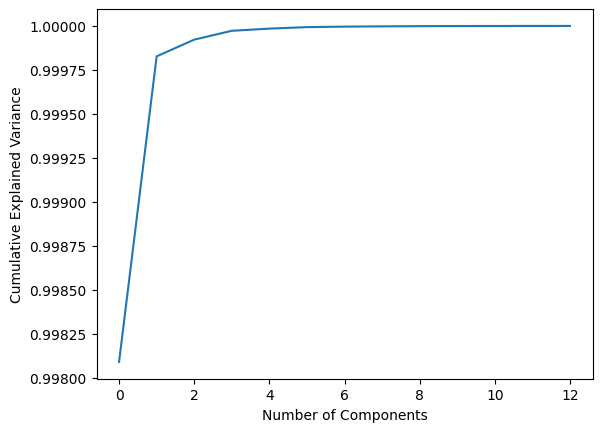

In [14]:
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pca__n_components': [2, 3, 4],
    'knn__n_neighbors': range(3, 15)

}

grid_search = GridSearchCV(pca_knn_pipeline, param_grid, cv=10, scoring='f1_macro')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'knn__n_neighbors': 11, 'pca__n_components': 4}
Best Score: 0.7085721468074409


In [16]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

#confusion matrix to determine the quantity of correct and wrong guesses by the model

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


In [18]:
######################################
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import make_scorer, balanced_accuracy_score, matthews_corrcoef
#balanced_accuracy = make_scorer(balanced_accuracy_score)
#mcc = make_scorer(matthews_corrcoef)

# Cross-validation with Balanced Accuracy#
#balanced_acc_scores = cross_val_score(param_grid, X, y, cv=5, scoring=balanced_accuracy)
#print("Balanced Accuracy Scores:", balanced_acc_scores)

# Cross-validation with MCC
#mcc_scores = cross_val_score(param_grid, X, y, cv=5, scoring=mcc)
#print("MCC Scores:", mcc_scores)

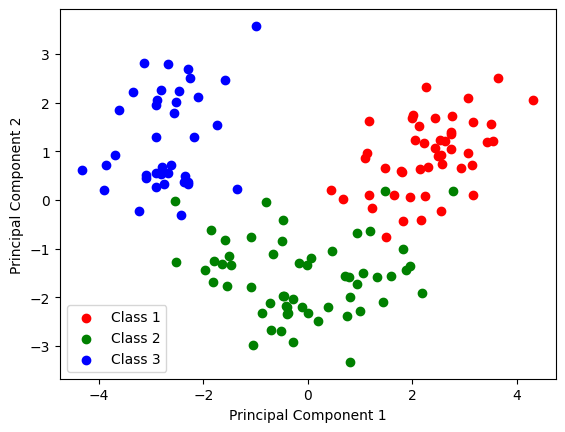

In [19]:
# plot the first two principal components with labels
colors = ["r", "g", "b"]
labels = ["Class 1", "Class 2", "Class 3"]
for i, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()



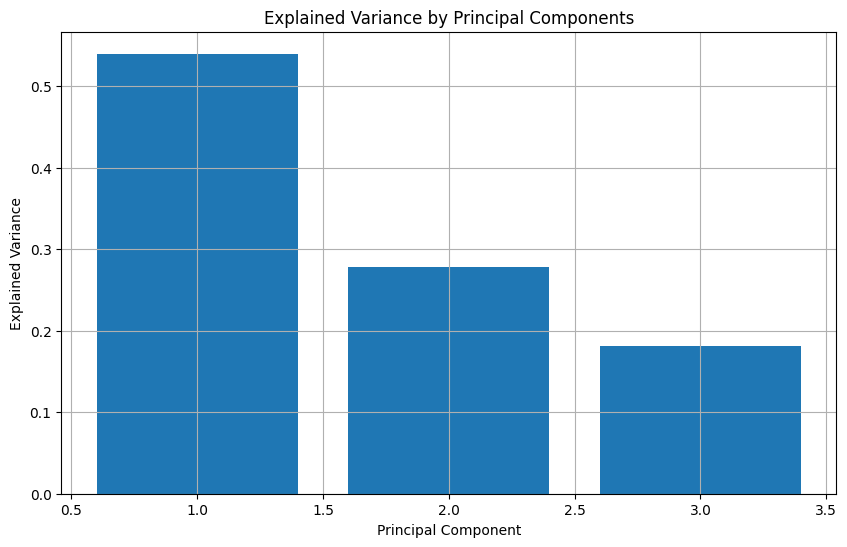

In [20]:


# Calculate explained variance for different numbers of principal components
pca = PCA().fit(X_train)
explained_variance = pca.explained_variance_ratio_

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()